In [579]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Parametros D.H.

In [580]:
#Angulos en Grados, distancias en mm
b1 = 0
tetha1R = 30
a1 = 100
alpha1R = 0

b2 = 0
tetha2R = 0
a2 = 100
alpha2R = 0

b3 = 0
tetha3R = -45
a3 = 50
alpha3R = 0

Conversion Grados a Radianes

In [581]:
tetha1 = (tetha1R*np.pi)/180
alpha1 = (alpha1R*np.pi)/180

tetha2 = (tetha2R*np.pi)/180
alpha2 = (alpha2R*np.pi)/180

tetha3 = (tetha3R*np.pi)/180
alpha3 = (alpha3R*np.pi)/180

print("tetha 1: {} rads\nalpha 1: {} rads".format(tetha1, alpha1) )
print("\ntetha 2: {} rads\nalpha 2: {} rads".format(tetha2, alpha2) )
print("\ntetha 3: {} rads\nalpha 3: {} rads".format(tetha3, alpha3) )


tetha 1: 0.5235987755982988 rads
alpha 1: 0.0 rads

tetha 2: 0.0 rads
alpha 2: 0.0 rads

tetha 3: -0.7853981633974483 rads
alpha 3: 0.0 rads


Matrices de Transformacion Homegenea

In [582]:
# Parametros b ( desplazamiento en el eje Z )

Tb1 = [[1, 0, 0, 0],
      [0, 1, 0, 0],
      [0, 0, 1, b1],
      [0, 0, 0, 1]]

Tb2 = [[1, 0, 0, 0],
      [0, 1, 0, 0],
      [0, 0, 1, b2],
      [0, 0, 0, 1]]

Tb3 = [[1, 0, 0, 0],
      [0, 1, 0, 0],
      [0, 0, 1, b3],
      [0, 0, 0, 1]]

In [583]:
# Parametros Tetha ( Rotacion en el eje Z )

Ttetha1 = [[np.cos(tetha1), -np.sin(tetha1), 0, 0],
          [np.sin(tetha1), np.cos(tetha1), 0, 0],
          [0, 0, 1, 0],
          [0, 0, 0, 1]]

Ttetha2 = [[np.cos(tetha2), -np.sin(tetha2), 0, 0],
          [np.sin(tetha2), np.cos(tetha2), 0, 0],
          [0, 0, 1, 0],
          [0, 0, 0, 1]]
Ttetha3 = [[np.cos(tetha3), -np.sin(tetha3), 0, 0],
          [np.sin(tetha3), np.cos(tetha3), 0, 0],
          [0, 0, 1, 0],
          [0, 0, 0, 1]]

print("Ttetha1:\n", np.matrix(Ttetha1).round(3) )
print("\nTtetha2:\n", np.matrix(Ttetha2).round(3) )
print("\nTtetha3:\n", np.matrix(Ttetha3).round(3) )

Ttetha1:
 [[ 0.866 -0.5    0.     0.   ]
 [ 0.5    0.866  0.     0.   ]
 [ 0.     0.     1.     0.   ]
 [ 0.     0.     0.     1.   ]]

Ttetha2:
 [[ 1. -0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]

Ttetha3:
 [[ 0.707  0.707  0.     0.   ]
 [-0.707  0.707  0.     0.   ]
 [ 0.     0.     1.     0.   ]
 [ 0.     0.     0.     1.   ]]


In [584]:
# Parametros a ( desplazamiento del eslabon en el eje X  )

Ta1 = [[1, 0, 0, a1],
      [0, 1, 0, 0],
      [0, 0, 1, 0],
      [0, 0, 0, 1]]

Ta2 = [[1, 0, 0, a2],
      [0, 1, 0, 0],
      [0, 0, 1, 0],
      [0, 0, 0, 1]]

Ta3 = [[1, 0, 0, a3],
      [0, 1, 0, 0],
      [0, 0, 1, 0],
      [0, 0, 0, 1]]

In [585]:
Talpha1 = [[1, 0, 0, 0],
         [0, np.cos(alpha1), -np.sin(alpha1), 0],
          [0, np.sin(alpha1), np.cos(alpha1), 0],
          [0, 0, 0, 1]]

Talpha2 = [[1, 0, 0, 0],
         [0, np.cos(alpha2), -np.sin(alpha2), 0],
          [0, np.sin(alpha2), np.cos(alpha2), 0],
          [0, 0, 0, 1]]

Talpha3 = [[1, 0, 0, 0],
         [0, np.cos(alpha3), -np.sin(alpha3), 0],
          [0, np.sin(alpha3), np.cos(alpha3), 0],
          [0, 0, 0, 1]]


print("Talpha1:\n", np.matrix(Talpha1) )
print("\nTalpha2:\n", np.matrix(Talpha2) )
print("\nTalpha3:\n", np.matrix(Talpha3).round(3) )

Talpha1:
 [[ 1.  0.  0.  0.]
 [ 0.  1. -0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]

Talpha2:
 [[ 1.  0.  0.  0.]
 [ 0.  1. -0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]

Talpha3:
 [[ 1.  0.  0.  0.]
 [ 0.  1. -0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


T1->0 = TL1 * TL0

TL1 = T_tras_b1 * T_rota_tetha1 * T_tras_a1 * T_rota_alpha1

TL0 = T_tras_b2 * T_rota_tetha2 * T_tras_a2 * T_rota_alpha2

In [586]:
#T1_1 = np.dot(Tb1, Ttetha1)
#T1_2 = np.dot(T1_1, Ta1)
#T1_a_0 = np.dot(T1_2, Talpha1)

T1_a_0 = np.dot(np.dot(np.dot(Tb1, Ttetha1), Ta1), Talpha1)

#print("\nMatriz de Transformacion T1 -> 0 (TL1): (a1 = {} mm, b1 = {}, tetha1 = {}°, alpha1 = {}°)\n\n" .format(a1, b1, tetha1R, alpha1R), np.matrix(T1_a_0) )

#Corrigiendo parametros de posicion
T1_a_0[0][3] = -50
T1_a_0[1][3] = 86.60254038
print("\nMatriz de Transformacion T1 -> 0 (TL1): (a1 = {} mm, b1 = {}, tetha1 = {}°, alpha1 = {}°)\n\n" .format(a1, b1, tetha1R, alpha1R), np.matrix(T1_a_0).round(3) )


Matriz de Transformacion T1 -> 0 (TL1): (a1 = 100 mm, b1 = 0, tetha1 = 30°, alpha1 = 0°)

 [[  0.866  -0.5     0.    -50.   ]
 [  0.5     0.866   0.     86.603]
 [  0.      0.      1.      0.   ]
 [  0.      0.      0.      1.   ]]


T2->1

In [587]:
#T2_1 = np.dot(Tb2, Ttetha2)
#T2_2 = np.dot(T2_1, Ta2)

T2_a_1 = np.dot(np.dot(np.dot(Tb2, Ttetha2), Ta2), Talpha2)

print("\nMatriz de Transformacion T2 -> 1 (TL2): (a2 = {} mm, b2 = {}, tetha2 = {}°, alpha2 = {}°)\n".format(a2, b2, tetha2R, alpha2R), np.matrix(T2_a_1).round(3) )


Matriz de Transformacion T2 -> 1 (TL2): (a2 = 100 mm, b2 = 0, tetha2 = 0°, alpha2 = 0°)
 [[  1.   0.   0. 100.]
 [  0.   1.   0.   0.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]


T3->2

In [588]:
#T3_1 = np.dot(Tb3, Ttetha3)
#T3_2 = np.dot(T3_1, Ta3)

T3_a_2 = np.dot(np.dot(np.dot(Tb3, Ttetha3), Ta3), Talpha3)

print("\nMatriz de Transformacion T3 -> 2 (TL3): (a3 = {} mm, b3 = {}, tetha3 = {}°, alpha3 = {}°)\n\n".format(a3, b3, tetha3R, alpha3R), np.matrix(T3_a_2).round(3)  )


Matriz de Transformacion T3 -> 2 (TL3): (a3 = 50 mm, b3 = 0, tetha3 = -45°, alpha3 = 0°)

 [[  0.707   0.707   0.     35.355]
 [ -0.707   0.707   0.    -35.355]
 [  0.      0.      1.      0.   ]
 [  0.      0.      0.      1.   ]]


Matriz de Transformacion Final Resultante

In [589]:
T10_21 = np.dot(T1_a_0, T2_a_1)
Tfinal = np.dot(np.dot(T1_a_0, T2_a_1), T3_a_2) 

print("\nMatriz de Transformacion TF (0 -> 3):\n\n", np.matrix(Tfinal).round(3) )


Matriz de Transformacion TF (0 -> 3):

 [[  0.966   0.259   0.     84.899]
 [ -0.259   0.966   0.    123.662]
 [  0.      0.      1.      0.   ]
 [  0.      0.      0.      1.   ]]


Hallamos las matrices de Transformacion para obtener los puntos P3, P2 y P1

In [590]:
print("\nMatriz de Transformacion Final (P3):\n", Tfinal.round(3))

P2 = np.dot(T1_a_0, T2_a_1)
print("\nMatriz de Transformacion Parcial (P2):\n", P2.round(3))

P2_1 = np.dot(Tfinal,  np.linalg.inv(T3_a_2) )
print("\nMatriz de Transformacion Parcial (P2):\n", P2_1.round(3))

P1 = np.dot( P2, np.linalg.inv(T2_a_1) )
print("\nMatriz de Transformacion Parcial 1 (P1):\n", P1.round(3))



Matriz de Transformacion Final (P3):
 [[  0.966   0.259   0.     84.899]
 [ -0.259   0.966   0.    123.662]
 [  0.      0.      1.      0.   ]
 [  0.      0.      0.      1.   ]]

Matriz de Transformacion Parcial (P2):
 [[  0.866  -0.5     0.     36.603]
 [  0.5     0.866   0.    136.603]
 [  0.      0.      1.      0.   ]
 [  0.      0.      0.      1.   ]]

Matriz de Transformacion Parcial (P2):
 [[  0.866  -0.5     0.     36.603]
 [  0.5     0.866   0.    136.603]
 [  0.      0.      1.      0.   ]
 [  0.      0.      0.      1.   ]]

Matriz de Transformacion Parcial 1 (P1):
 [[  0.866  -0.5     0.    -50.   ]
 [  0.5     0.866   0.     86.603]
 [  0.      0.      1.      0.   ]
 [  0.      0.      0.      1.   ]]


In [591]:
print("======== P3 ========")
xJ3 = Tfinal[0,3]
yJ3 = Tfinal[1,3]
print("xJ3:", xJ3.round(3))
print("yJ3:", yJ3.round(3))

print("======== P2 ========")
xJ2 = P2[0,3]
yJ2 = P2[1,3]
print("\nxJ2:", xJ2.round(3))
print("yJ2:", yJ2.round(3))

print("======== P1 ========")
xJ1 = P1[0,3]
yJ1 = P1[1,3]
print("\nxJ1:", xJ1.round(3))
print("yJ1:", xJ1.round(3))

======== P3 ========
xJ3: 84.899
yJ3: 123.662
======== P2 ========

xJ2: 36.603
yJ2: 136.603
======== P1 ========

xJ1: -50.0
yJ1: -50.0


Graficamos los puntos para ver el resultado del modelo

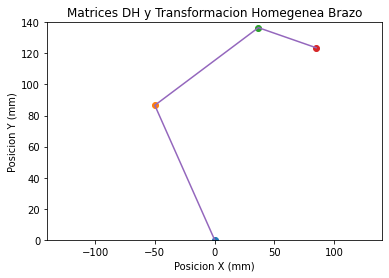

In [592]:
fix, axes = plt.subplots()
plt.plot(0,0,'o')
plt.plot(xJ1, yJ1, 'o')
plt.plot(xJ2, yJ2, 'o')
plt.plot(xJ3, yJ3, 'o')
plt.plot([0, xJ1, xJ2, xJ3], [0, yJ1, yJ2, yJ3])
plt.title("Matrices DH y Transformacion Homegenea Brazo")
plt.xlabel("Posicion X (mm)")
plt.ylabel("Posicion Y (mm)")
axes.set_xlim(-140, 140)
axes.set_ylim(0, 140)

plt.show()

In [593]:
'''
figura = plt.figure()
grafica = figura.add_subplot(111, projection='3d')
grafica.scatter(0, 0, 0, c='blue', marker='o', label = 'Origen')
grafica.scatter(xJ1, yJ1, 0, c='orange', marker='o', label = 'P1')
grafica.scatter(xJ2, yJ2, 0, c='green', marker='o', label = 'P2')
grafica.scatter(xJ3, yJ3, 0, c='red', marker='o', label = 'P3')


grafica.set_xlabel('Eje X')
grafica.set_ylabel('Eje Y')
grafica.set_zlabel('Eje Z')
grafica.legend()
grafica.view_init(35, 25)
plt.show()
'''


"\nfigura = plt.figure()\ngrafica = figura.add_subplot(111, projection='3d')\ngrafica.scatter(0, 0, 0, c='blue', marker='o', label = 'Origen')\ngrafica.scatter(xJ1, yJ1, 0, c='orange', marker='o', label = 'P1')\ngrafica.scatter(xJ2, yJ2, 0, c='green', marker='o', label = 'P2')\ngrafica.scatter(xJ3, yJ3, 0, c='red', marker='o', label = 'P3')\n\n\ngrafica.set_xlabel('Eje X')\ngrafica.set_ylabel('Eje Y')\ngrafica.set_zlabel('Eje Z')\ngrafica.legend()\ngrafica.view_init(35, 25)\nplt.show()\n"